<a href="https://colab.research.google.com/github/Daniel-2003-python/IAyRedesN_ENE-JUN_2025/blob/main/Actividades/AF6_ArbolDeDecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje Supervisado, Árbol de Decisión

AUTORES:

DANIEL SILVA GARZA - 2109354 - N5

PEDRO DAMIAN ARGUELLO PEREZ - 2048101 - N5

OSCAR RAUL OSORIO MARTINEZ - 2004875 - N5

BRANDON BAROCIO - 1960720 - N5

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df= pd.read_csv("/content/drive/MyDrive/Robot Sensors/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Eliminar columna de ID si existe
if 'id' in df.columns:
    df.drop(['id'], axis=1, inplace=True)

# Convertir la variable objetivo a valores numéricos (M = 1, B = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separar características y etiquetas
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

# División 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Entrenamiento del Arbol de Decisión

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Predicciones de Datos de Prueba

In [ ]:
# Realizar 3 predicciones
print("Predicciones para las 3 primeras muestras del conjunto de prueba:", clf.predict(X_test[:3]))

# Predicciones completas para evaluación
y_pred = clf.predict(X_test)

Predicciones para las 3 primeras muestras del conjunto de prueba: [0 1 1]


Evaluaciones del Modelo

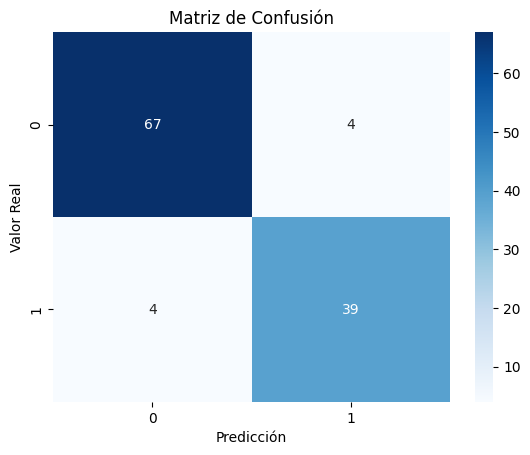

Precisión del modelo: 0.9298245614035088

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

# Precisión
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Visualización del Árbol

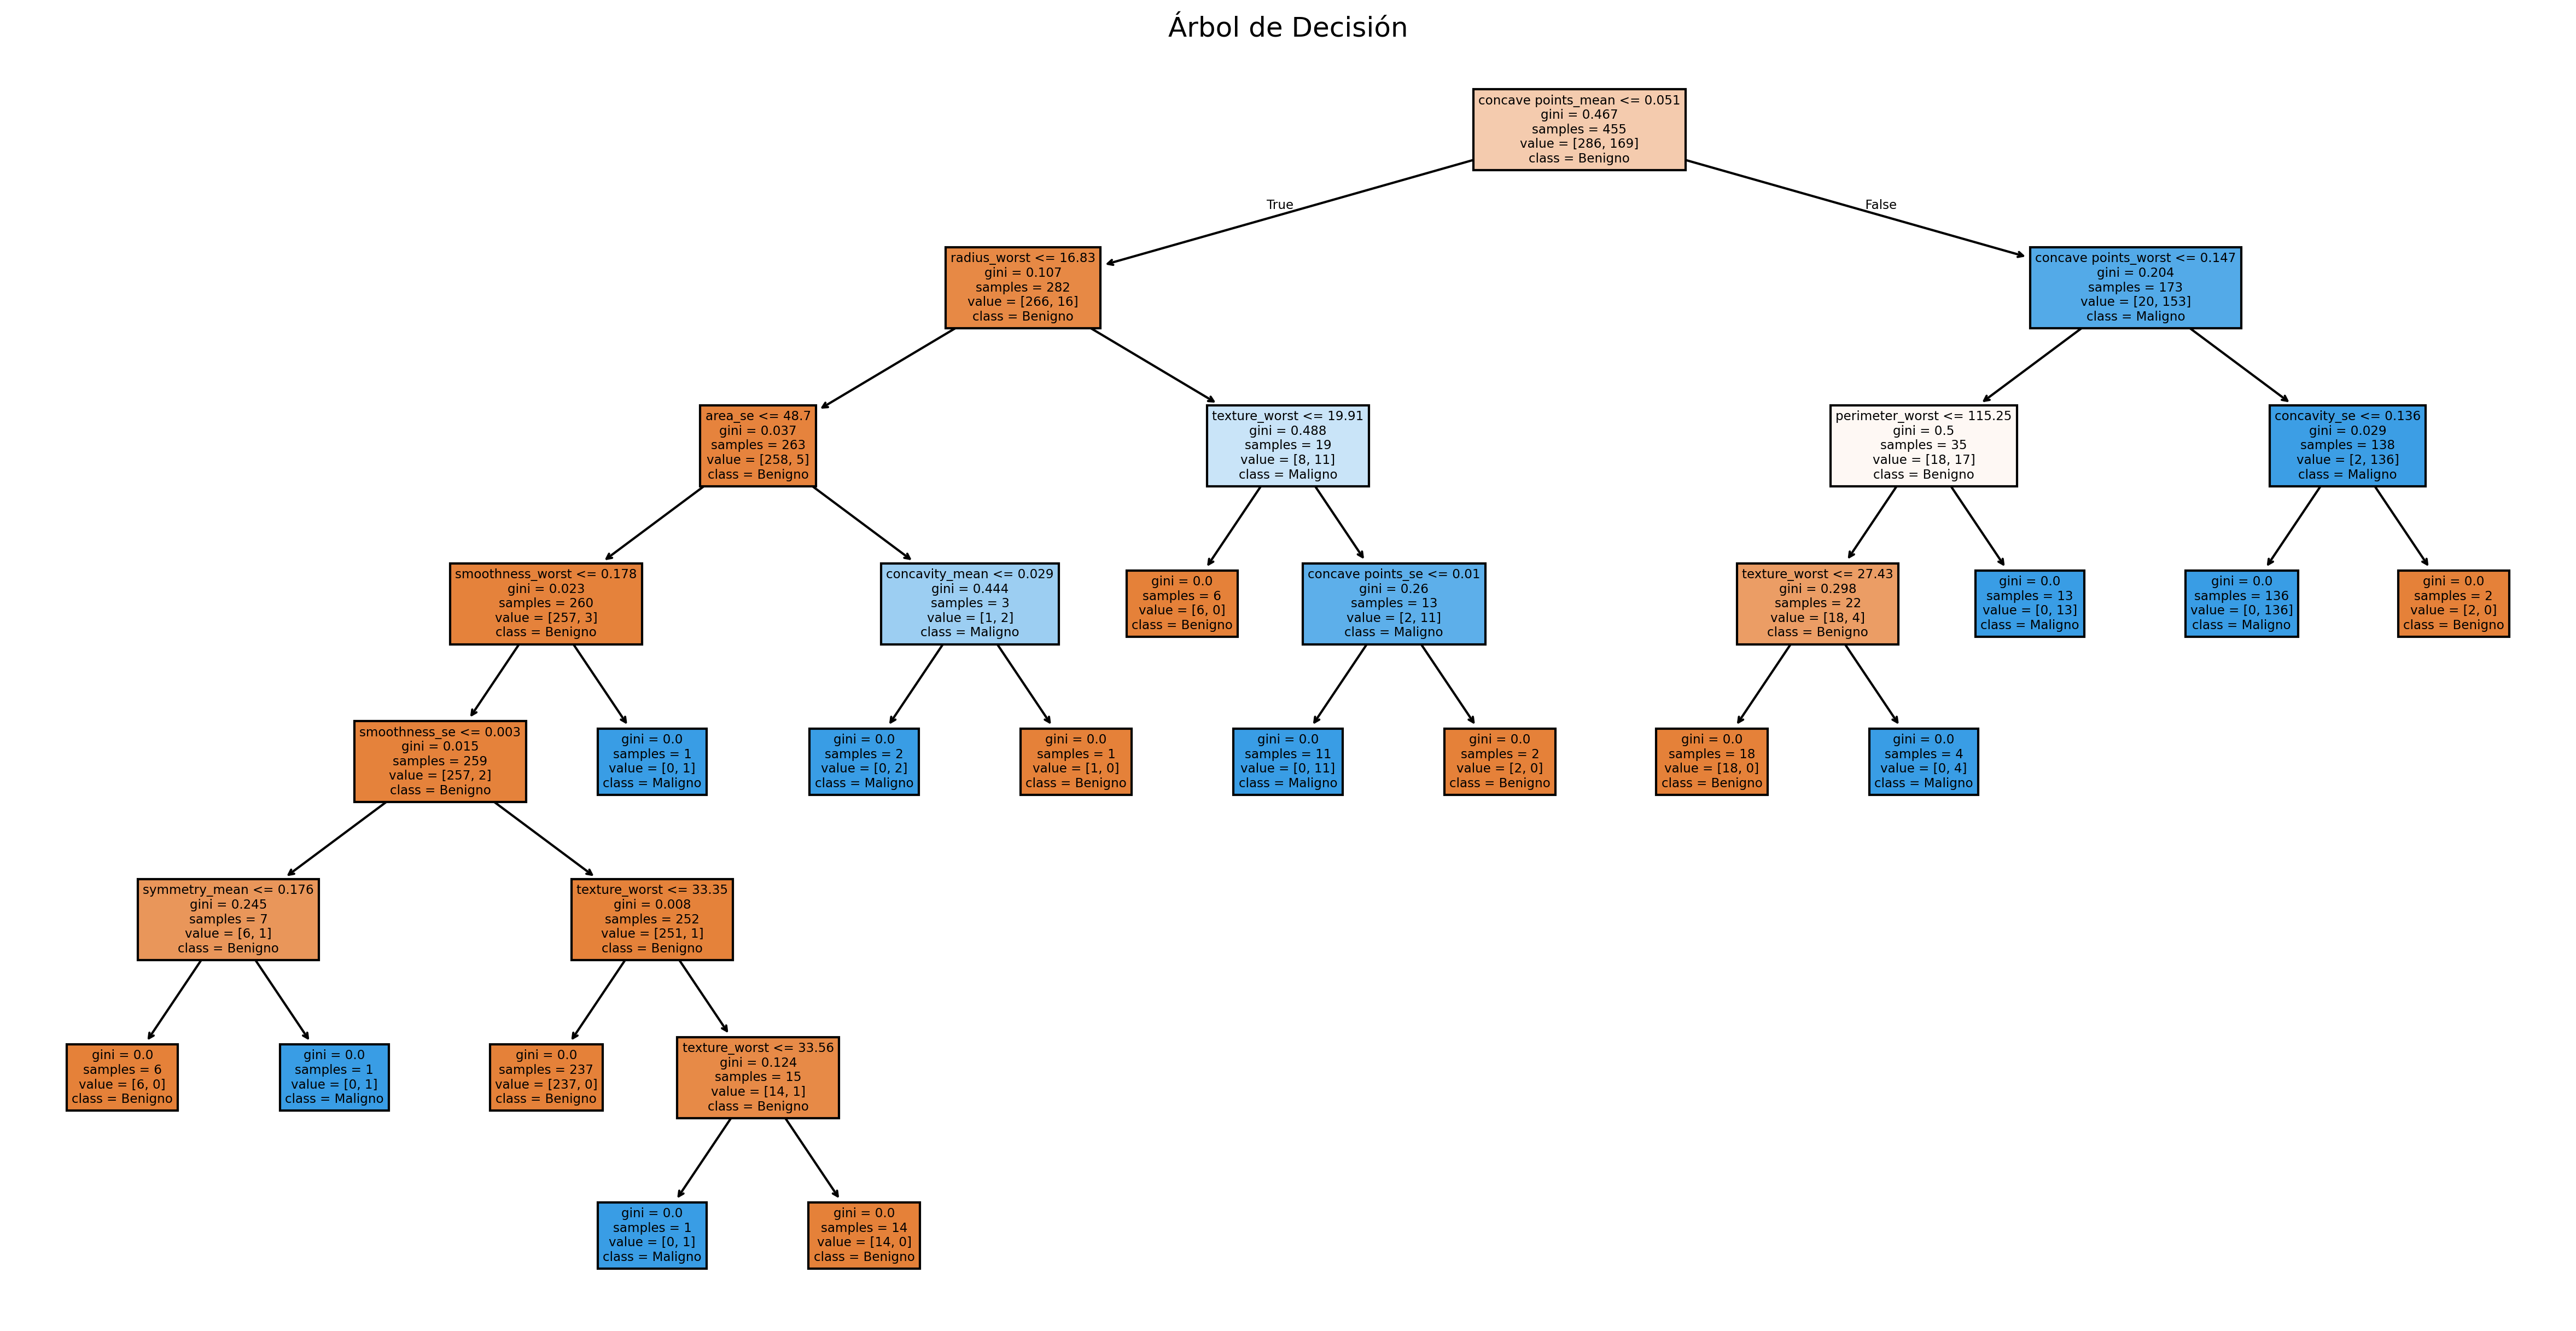

In [ ]:
plt.figure(figsize=(20,10), dpi=300)
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Benigno", "Maligno"])
plt.title("Árbol de Decisión")
plt.show()